In [1]:
# pip install FlowKit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import flowkit as fk
from sklearn.neighbors import NearestNeighbors
from pathlib import Path
import time
%matplotlib inline

In [2]:
# open fcs file
sample = fk.Sample('export_export_O4_Singlets_sample50.fcs')
print(sample.event_count)
sample.channels

500000


,channel_number,pnn,pns,png,pne,pnr
0,1,FSC-A,FSC - Area,1.0,"(0.0, 0.0)",1.0
1,2,SSC-A,SSC - Area,1.0,"(0.0, 0.0)",1.0
2,3,AF488-A,CD8 : AF488 - Area,1.0,"(0.0, 0.0)",1.0
3,4,AF647-A,Puromycin : AF647 - Area,1.0,"(0.0, 0.0)",1.0
4,5,AF700-A,CD45RA : AF700 - Area,1.0,"(0.0, 0.0)",1.0
5,6,AF750-A,CCR4 : AF750 - Area,1.0,"(0.0, 0.0)",1.0
6,7,APC-Fire810-A,CD14 : APC-Fire810 - Area,1.0,"(0.0, 0.0)",1.0
7,8,BB515-A,CD20 : BB515 - Area,1.0,"(0.0, 0.0)",1.0
8,9,BB700-A,CD141 : BB700 - Area,1.0,"(0.0, 0.0)",1.0
9,10,BUV395-A,CD36 : BUV395 - Area,1.0,"(0.0, 0.0)",1.0


In [3]:
# Rename channels of interest
sample.rename_channel('UMAP.1.Singlets.3TTB', 'UMAP.1')
sample.rename_channel('UMAP.2.Singlets.3TTB', 'UMAP.2')
sample.rename_channel('SBB675-A', 'CD45_X')
sample.rename_channel('PE-Fire810-A', 'CD45_Y')
sample.channels

,channel_number,pnn,pns,png,pne,pnr
0,1,FSC-A,FSC - Area,1.0,"(0.0, 0.0)",1.0
1,2,SSC-A,SSC - Area,1.0,"(0.0, 0.0)",1.0
2,3,AF488-A,CD8 : AF488 - Area,1.0,"(0.0, 0.0)",1.0
3,4,AF647-A,Puromycin : AF647 - Area,1.0,"(0.0, 0.0)",1.0
4,5,AF700-A,CD45RA : AF700 - Area,1.0,"(0.0, 0.0)",1.0
5,6,AF750-A,CCR4 : AF750 - Area,1.0,"(0.0, 0.0)",1.0
6,7,APC-Fire810-A,CD14 : APC-Fire810 - Area,1.0,"(0.0, 0.0)",1.0
7,8,BB515-A,CD20 : BB515 - Area,1.0,"(0.0, 0.0)",1.0
8,9,BB700-A,CD141 : BB700 - Area,1.0,"(0.0, 0.0)",1.0
9,10,BUV395-A,CD36 : BUV395 - Area,1.0,"(0.0, 0.0)",1.0


In [ ]:
#Plotting channels
import bokeh
from bokeh.plotting import show
bokeh.io.output_notebook()

p = sample.plot_scatter(
    'UMAP.1', 'UMAP.2',
    source='raw', subsample=False, color_density=True
)

show(p)

In [6]:
# Apply the same bioexponential transformation as FlowJo to the desired channels
# Get the desired XY coordinates to subset the data in groups
biex_xform = fk.transforms.WSPBiexTransform(
    max_value=100000,
    positive=4.0,
    width=-158,
    negative=0
)


sample.apply_transform(biex_xform)

# Showing only 10000 events
cd45 = sample.plot_scatter(
    'CD45_X', 'CD45_Y',
    source='xform', subsample=True, color_density=True
)

show(cd45)

In [7]:
# puromycin values after transformation
l = sample.plot_histogram('AF647-A', source='xform')
show(l)

In [7]:
# get UMAP data first with the events (no transformation) -> Numpy array
df_umap = sample.as_dataframe(source='raw', col_multi_index=False, subsample=False)[['UMAP.1', 'UMAP.2']].values
# get CD45 and puto data transformed -> Numpy array
df_ch = sample.as_dataframe(source='xform', col_multi_index=False, subsample=False)[['CD45_X','CD45_Y','AF647-A']].values
# merge both datasets
df_full_ch = np.column_stack((df_umap, df_ch))

# Subset data to keep only the desired channels: UMAPs, CD45s and puro.
# It generates Numpy arrays
np.set_printoptions(precision=2, suppress=True)
print(df_full_ch.shape)
print()
print(df_full_ch[0:5,:])



(500000, 5)

[[  -1.24    4.05 1122.24 1094.92 1105.48]
 [   5.22    1.42 1060.83 1464.83 3313.68]
 [   5.14    2.94 1285.04 1201.44 3502.13]
 [   4.62   -7.09 1352.44 2766.61 3337.81]
 [   1.28   -5.11 3212.3  2783.66 3047.68]]


In [8]:
# Add a new column to flag events based on the group which they belong
# In this case the gate is set at a value of 2000 for X and 1700 for Y
thrX = 2000
thrY = 1700

flags = np.zeros(len(df_full_ch), dtype=int)

# subset is based on the CD45 columns

cond1 = (df_full_ch[:, 2] < thrX) & (df_full_ch[:, 3] > thrY)
cond2 = (df_full_ch[:, 2] > thrX) & (df_full_ch[:, 3] > thrY)
cond3 = (df_full_ch[:, 2] < thrX) & (df_full_ch[:, 3] < thrY)
cond4 = (df_full_ch[:, 2] > thrX) & (df_full_ch[:, 3] < thrY)

flags[cond1] = 1
flags[cond2] = 2
flags[cond3] = 3
flags[cond4] = 4

df_full_ch_flag = np.column_stack((df_full_ch, flags))

print(df_full_ch_flag.shape)
print(df_full_ch_flag[0:5,:])

(500000, 6)
[[  -1.24    4.05 1122.24 1094.92 1105.48    3.  ]
 [   5.22    1.42 1060.83 1464.83 3313.68    3.  ]
 [   5.14    2.94 1285.04 1201.44 3502.13    3.  ]
 [   4.62   -7.09 1352.44 2766.61 3337.81    1.  ]
 [   1.28   -5.11 3212.3  2783.66 3047.68    2.  ]]


In [9]:
# Count the groups frequency (ideally 25%)
unique_values, counts = np.unique(df_full_ch_flag[:,-1], return_counts=True)
counts =  np.round(counts/len(df_full_ch_flag)*100,2)

frequency_table = list(zip(unique_values,counts))
frequency_table

[(1.0, 24.79), (2.0, 17.98), (3.0, 29.13), (4.0, 28.1)]

In [10]:
# Example of use with only 1 point
# It serves to check optimal radius lenght
# Fit the NearestNeighbors model only to the umap dimensions 

radius = 0.8
nbrs_data = df_full_ch_flag[:,(0,1)] # neighbors are only considered based on UMAP columns
nbrs = NearestNeighbors(radius= radius, algorithm='auto').fit(nbrs_data)

# get the neigbors for the first point
distances, indices = nbrs.radius_neighbors([nbrs_data[0]], sort_results= True)

# Extract the coordinates of the neighbors for the first point based on the indexes
neighbors = df_full_ch_flag[indices[0]]

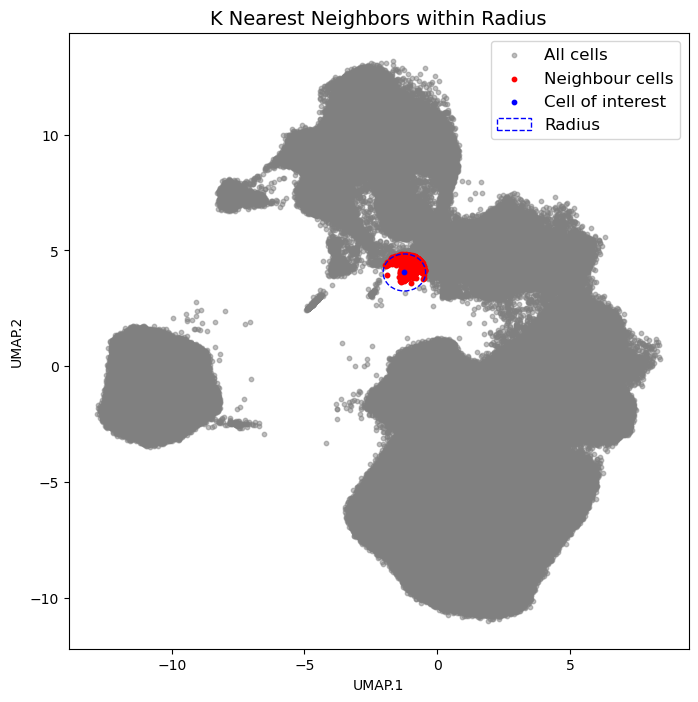

In [49]:
plt.figure(figsize=(8, 8))
plt.scatter(df_full_ch_flag[:, 0], df_full_ch_flag[:, 1], s=10, alpha=0.5, c='gray', label='All cells')

# Highlight the neighbors within the radius
plt.scatter(neighbors[:, 0], neighbors[:, 1], s=10, c='red', label='Neighbour cells')

# Mark the first point
plt.scatter(df_full_ch_flag[0, 0], df_full_ch_flag[0, 1], s=10, c='blue', label='Cell of interest')
circle = plt.Circle((df_full_ch_flag[0, 0], df_full_ch_flag[0, 1]), radius, color='blue', fill=False, linestyle='--', label='Radius')
plt.gca().add_artist(circle)

# Add labels and legend
plt.title('K Nearest Neighbors within Radius', fontsize=14)
plt.xlabel('UMAP.1')
plt.ylabel('UMAP.2')
plt.legend(fontsize=12)
plt.grid(False)

# Save and show the plot
# plt.savefig('KNNs_plot.png')
plt.show()

Calculate metabolic parameters

In [16]:
def metab_params(puroflag):
    '''This function takes a 2D numpy array with puromycin MFI values on the first column
    and a second column indicating to which group the cell belongs (flag). It calculates the mitochondrial
    and glucose dependencies.
    '''
    # Subset the data based on the cell group and takes the mean of the puro values
    # Before running the mean it check that the list is not empty to avoid errors in the division
    DG = np.mean(puroflag[puroflag[:, 1] == 1, 0]) if np.any(puroflag[:, 1] == 1) else 0
    DGO = np.mean(puroflag[puroflag[:, 1] == 2, 0]) if np.any(puroflag[:, 1] == 2) else 0
    C = np.mean(puroflag[puroflag[:, 1] == 3, 0]) if np.any(puroflag[:, 1] == 3) else 0
    O = np.mean(puroflag[puroflag[:, 1] == 4, 0]) if np.any(puroflag[:, 1] == 4) else 0

    # Calculates metabolic parameters
    mito_dep = (C - O)/(C-DGO)*100
    gluc_dep = (C - DG)/(C-DGO)*100

    # limit dependencies values to set negative to 0 or no sense higher values to 200
    mito_dep = np.clip(mito_dep, 0, 100)
    gluc_dep = np.clip(gluc_dep, 0, 100)

    return [mito_dep, gluc_dep] 

In [17]:
def group_compos(puroflag):
    '''This function calculates de percentage of each group in the points
    that conform the KNN of a point. Ideally this value should be 25% for each.
    '''
    # Counts the number of occurences of each group and removes occurences for group 0, that does not exist
    counts = np.bincount(puroflag[:, 1].astype(int), minlength=5)[1:]

    return (counts / len(puroflag)) * 100  # returns percentages

In [19]:
# Generate KNN instance
r = 0.8
nbrs_data = df_full_ch_flag[:,(0,1)] # neighbors are only considered based on UMAP columns
nbrs = NearestNeighbors(radius= r, algorithm='auto').fit(nbrs_data)

In [18]:
# Run the whole loop to calculate metabolic parameters for each cell based on its neighbors
min_cells = 1500

# Create list to save the results
lenghts = np.zeros(len(nbrs_data))
gluc_dep= np.zeros(len(nbrs_data))
mito_dep= np.zeros(len(nbrs_data))

# Save the proportion of each group per each iteration
groups = {'C':[], 'O':[], 'DG':[], 'DGO':[]}

start_time = time.time()
for point in range(len(nbrs_data)):
    indices = nbrs.radius_neighbors([nbrs_data[point]], sort_results= True)[1][0]  # KNNs of the point and returns the indexes [1][0]  
    lenghts[point] = len(indices)
    if len(indices) >= min_cells:  # excludes cells with very few neigbours
        data_full_sub = df_full_ch_flag[indices][:, (-2,-1)] # Only kepts the last 2 columns (puro and flags)
        umap_data_calc = metab_params(data_full_sub)
        grp_compo = group_compos(data_full_sub)
        # Add results to the lists
        mito_dep[point] = umap_data_calc[0]
        gluc_dep[point] = umap_data_calc[1]
        # Add neigbours group composition to the diccionary
        groups['C'].append(grp_compo[0])
        groups['O'].append(grp_compo[1])
        groups['DG'].append(grp_compo[2])
        groups['DGO'].append(grp_compo[3])   

end_time = time.time()

# Append results to the dataframe
data_full_metab = np.round(np.column_stack((df_full_ch_flag, mito_dep, gluc_dep)),2)
execution_time = end_time - start_time
print(f"Execution time: {execution_time:.2f} seconds")

Execution time: 1410.17 seconds


In [19]:
# % of non 0 values
# Set Na values to 0
mito_dep[np.isnan(mito_dep)] = 0
gluc_dep[np.isnan(gluc_dep)] = 0

mito_dep_no0 = np.count_nonzero(mito_dep)/len(mito_dep)*100
gluc_dep_no0 = np.count_nonzero(gluc_dep)/len(gluc_dep)*100

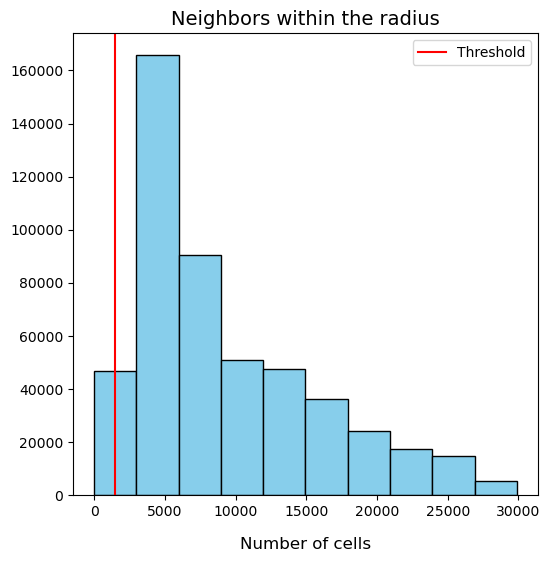

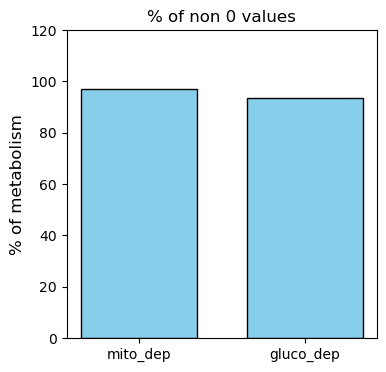

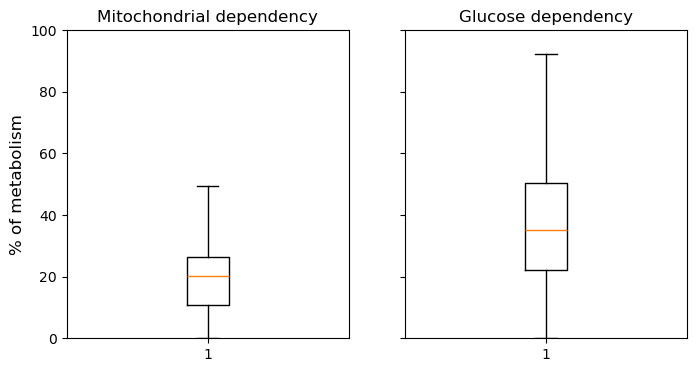

In [36]:
# Metrics plots

plt.figure(figsize=(6, 6))
plt.hist(lenghts, bins=10,edgecolor="black", color='skyblue')
plt.axvline(x = min_points, color = 'r', linestyle = '-')
plt.title('Neighbors within the radius', fontsize=14)
plt.xlabel('Number of cells', labelpad=13, fontsize=12)
plt.legend(['Threshold'])
plt.show()

# % of non 0 values
plt.figure(figsize=(4, 4))
plt.bar(['mito_dep','gluco_dep'],[mito_dep_no0,gluc_dep_no0], width=0.7, edgecolor="black",color='skyblue')
plt.title('% of non 0 values')
plt.ylim(0,120)
plt.ylabel('% of metabolism', fontsize=12)
plt.show()

# Boxplots mito and gluco dep
fig, axs = plt.subplots(1, 2,figsize = (8, 4), sharey=True)
axs[0].boxplot(mito_dep, showfliers=False)
axs[0].set_title('Mitochondrial dependency')
axs[0].set_ylim(0,100)
axs[0].set_ylabel('% of metabolism', fontsize=12)

axs[1].boxplot(gluc_dep, showfliers=False)
axs[1].set_title('Glucose dependency')
# axs[1].set_ylim(0,150)
plt.show()


In [37]:
# Violin plots to show group distribution per cell neighbors
df_vio = pd.DataFrame.from_dict(groups)

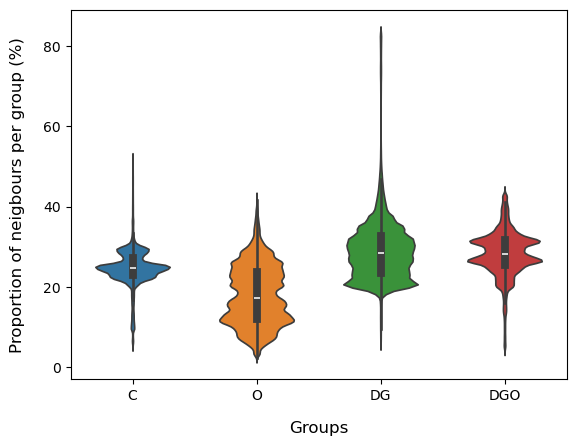

In [40]:
sns.violinplot(data=df_vio,width=0.6)
plt.ylabel('Proportion of neigbours per group (%)', labelpad=13, fontsize=12)
plt.xlabel('Groups', labelpad=13, fontsize=12)
plt.show()

In [43]:
# Create custom color map to have 0 values as light grey
from matplotlib.colors import Normalize, ListedColormap
original_cmap = plt.cm.plasma
colors = original_cmap(np.linspace(0, 1, 256))
colors[0] = [0.8, 0.8, 0.8, 1.0]  # Light grey for the 0 value
custom_cmap = ListedColormap(colors)

norm = Normalize(vmin=data_full_metab[:, -2].min(), vmax=data_full_metab[:, -2].max())
# custom_cmap

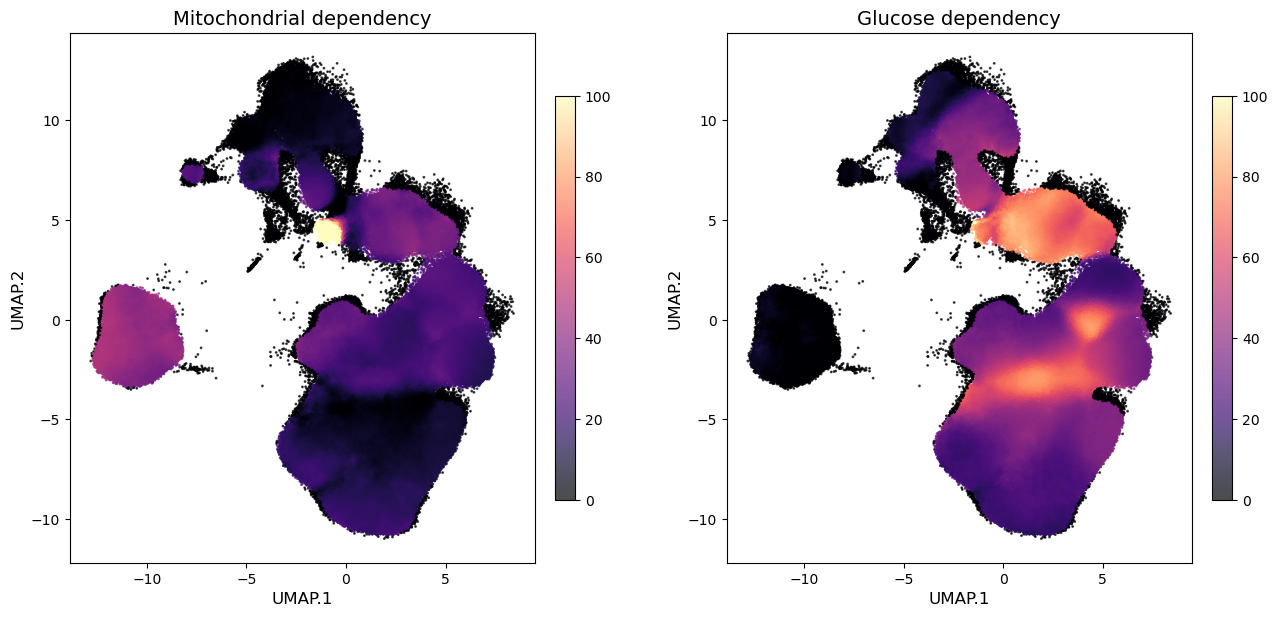

In [58]:
# Plot UMAP + metab data
fig, axs = plt.subplots(1, 2,figsize = (15, 15))
# mito dependency
# mt_sc = axs[0].scatter(data_full_metab[:, 0], data_full_metab[:, 1], c=data_full_metab[:, -2],cmap=custom_cmap, norm=norm, s=1, alpha=0.7)
mt_sc = axs[0].scatter(data_full_metab[:, 0], data_full_metab[:, 1], c=data_full_metab[:, -2],cmap='magma', s=1, alpha=0.7)
axs[0].set_title('Mitochondrial dependency', fontsize=14)
axs[0].set_xlabel('UMAP.1', fontsize=12)
axs[0].set_ylabel('UMAP.2', fontsize=12)
axs[0].grid(False)
axs[0].set_aspect('equal', adjustable='box')

colorbar = fig.colorbar(mt_sc, ax=axs[0], orientation='vertical', fraction=0.04, pad=0.04)
# colorbar.set_label('Mito_dep', rotation=270, labelpad=15)

# Second plot
# glc_sc = axs[1].scatter(data_full_metab[:, 0], data_full_metab[:, 1], c=data_full_metab[:, -1], cmap=custom_cmap, norm=norm, s=1, alpha=0.7)
glc_sc = axs[1].scatter(data_full_metab[:, 0], data_full_metab[:, 1], c=data_full_metab[:, -1], cmap='magma', s=1, alpha=0.7)
axs[1].set_title('Glucose dependency', fontsize=14)
axs[1].set_xlabel('UMAP.1', fontsize=12)
axs[1].set_ylabel('UMAP.2', fontsize=12)
axs[1].set_aspect('equal', adjustable='box')
axs[1].grid(False)

colorbar = fig.colorbar(glc_sc, ax=axs[1], orientation='vertical', fraction=0.04, pad=0.04)
# colorbar.set_label('Gluco_dep', rotation=270, labelpad=15)

plt.subplots_adjust(wspace=0.3)
plt.show()

In [59]:
# Make the results directory
results = Path("results")
try:
    results.mkdir(exist_ok=True)
    print(f"Directory '{results}' created successfully.")
except Exception as e:
    print(f"An error occurred: {e}")

Directory 'results' created successfully.


In [60]:
# Add metab params to the full fcs file and export
df = sample.as_dataframe(source='raw', col_multi_index=False, subsample=False)
df['mito_dep'] = mito_dep
df['gluco_dep'] = gluc_dep
df_sample = fk.Sample(df, sample_id= 'SCENITH')
df_sample.export('results/Data_metab.fcs',source='raw')